# 0. Import Dependencies and Pretrained Model

In [33]:
!pip install "tensorflow>=2.0.0"
!pip install --upgrade tensorflow-hub
#sudo apt install libopencv-dev python3-opencv  # for linux
!pip install matplotlib
!pip install numpy


Requirement already up-to-date: tensorflow-hub in /home/khalid/.local/lib/python3.8/site-packages (0.12.0)


In [34]:
import tensorflow_hub as hub
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [35]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# 1. Preprocess Image and Load

In [36]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [37]:
content_image = load_image('dog.jpg')
style_image = load_image('woman.jpg')

# 2. Visualize Output

In [38]:
content_image.shape

TensorShape([1, 1200, 1920, 3])

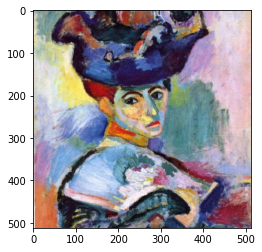

In [39]:
plt.imshow(np.squeeze(style_image))
plt.show()

# 3. Stylize Image

In [40]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

2022-01-06 11:04:59.622643: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 589824000 exceeds 10% of free system memory.
2022-01-06 11:04:59.686514: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 591422464 exceeds 10% of free system memory.


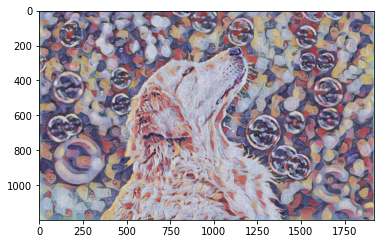

In [41]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [42]:
cv2.imwrite('final_dog.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True